In [1]:
# %pip install rdkit-pypi
import rdkit as rd
from rdkit import Chem
from rdkit.Chem import AllChem
import unittest
import numpy as np
import matplotlib.pyplot as plt
import moleculegraph
from moleculegraph.molecule_utils import *
import networkx as nx

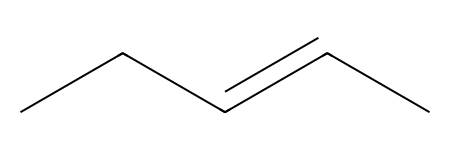

In [2]:
s = 'CCC=CC'

m = Chem.MolFromSmiles(s)
m

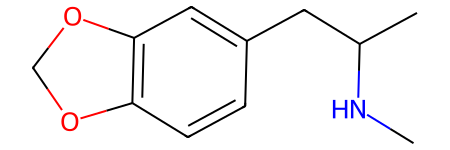

In [3]:
s = 'CC(CC1=CC2=C(C=C1)OCO2)NC'

m = Chem.MolFromSmiles(s)
AllChem.Compute2DCoords(m)

#_ = AllChem.GenerateDepictionMatching2DStructure(m,m)


dummy = ''.join([i for i in s if not i.isdigit()])
rlist = [ "(", ")" ]
for x in rlist:
    #print(x)
    dummy = dummy.replace(x,"")

m

In [4]:
# get molecule names from smiles

dummy = ''.join([i for i in s if not i.isdigit()])
rlist = [ "(", ")" ]
for x in rlist:
    #print(x)
    dummy = dummy.replace(x,"")

alist = ["="]
x = alist[0]
names = []
for i,d in enumerate( dummy.split(x) ):
    ddummy = list(d)
    if i > 0:
        ddummy[0] = x + ddummy[0] 
    names += list(ddummy)
    
for i,n in enumerate(names):
    names[i] = n+str( int(i) ) 
names = np.array(names)

branch
ring
ring
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2.]
f_p , self.f[f_p] [ 2 14 16] [ 2. -5. -6.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
fin branches [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


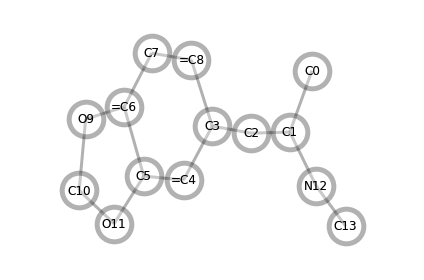

[C0][C1][b2][N12][C13][C2][C3][=C8][C7][=C6][O9][C10][O11][C5][r5][=C4][r6]


In [5]:
bond_list, _ = get_bond_list_from_smiles(s)

molstring = get_graphstring(bond_list, names)


molecule = moleculegraph.molecule(molstring)
molecule.visualize()
print(molstring)

In [6]:
ends = np.concatenate( [molecule.branch_end_numbers, molecule.ring_close_numbers, molecule.ring_root_numbers] ).astype(int)
ends

array([ 0,  3, 12, 13,  8,  5])

0 C0
['C0' 'C1' '=C4' 'C5' 'C13' 'N12' 'O11' 'C10' 'O9' '=C8' 'C7' '=C6']
branch
ring
ring
[C0][C1][b2][N12][C13][C2][C3][=C4][C5][O11][C10][O9][=C6][r5][C7][=C8][r6]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2.]
f_p , self.f[f_p] [ 2 13 16] [ 2. -5. -6.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2.]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
fin branches [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


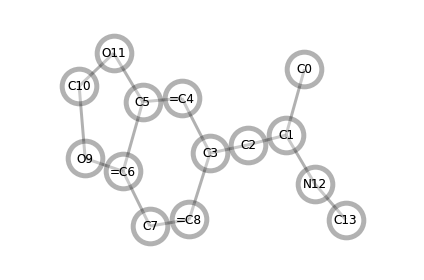

NEXT


3 C13
['C3' 'C2' 'C1' '=C4' 'C5' 'C13' 'N12' 'O11' 'C10' 'O9' '=C8' 'C7' '=C6']
branch
ring
ring
[C13][N12][C1][b1][C0][C2][C3][=C4][C5][O11][C10][O9][=C6][r5][C7][=C8][r6]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2.]
f_p , self.f[f_p] [ 3 13 16] [ 1. -5. -6.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
fin branches [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


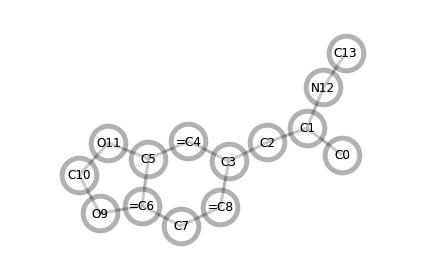

NEXT


12 C5
['N12' 'O11' 'C10' 'O9' '=C8' 'C7' '=C6' 'C5' '=C4' 'C1' 'C2' 'C3']
ERROR
NEXT


13 =C4
['C13' 'N12' 'O11' 'C10' 'O9' '=C8' 'C7' '=C6' 'C5' '=C4' 'C1' 'C2' 'C3']
ring
branch
ring
[=C4][C5][O11][C10][O9][=C6][r5][C7][=C8][C3][r6][C2][C1][b1][C0][N12][C13]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 2. 2. 0. 0.]
f_p , self.f[f_p] [ 6 10 13] [-5. -6.  1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 2. 2. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 2. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0.]
fin branches [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0.]


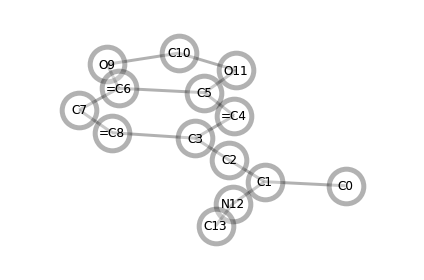

NEXT


8 =C6
['=C8' 'O9' 'C10' 'O11' 'N12' 'C13' 'C5' '=C4' 'C1' 'C2' 'C3']
ERROR
NEXT


5 C3
['C5' 'C13' 'N12' 'O11' 'C10' 'O9' '=C8' 'C7' '=C6']
ring
branch
ring
branch
[C3][b4][C2][C1][b1][C0][N12][C13][=C4][C5][O11][C10][O9][=C6][r5][C7][=C8][r6]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3.]
f_p , self.f[f_p] [ 1  4 14 17] [ 4.  1. -5. -6.]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3.]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3.]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3.]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
fin branches [0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


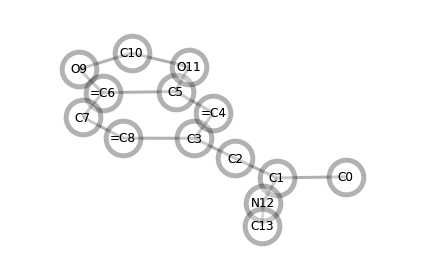

NEXT




In [7]:
"""

=C6, C5: branch close on start should not work

"""

graph = graph_from_bonds(molecule.bond_list)
for end in ends:
    print(end, molecule.atom_names[end])
    main_path_dummy  = get_longest_path(graph,source=end)
    print( names[main_path_dummy] )
    molstring_dummy = get_graphstring_set_main(graph, molecule.bond_list, molecule.atom_names, main_path_dummy)
    if molstring_dummy:
        print(molstring_dummy)
        molecule_dummy = moleculegraph.molecule(molstring_dummy)
        molecule_dummy.visualize()
    print("NEXT\n\n")
    

[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3.]
f_p , self.f[f_p] [ 1  4 14 17] [ 4.  1. -5. -6.]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3.]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3.]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3.]
[0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
fin branches [0. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


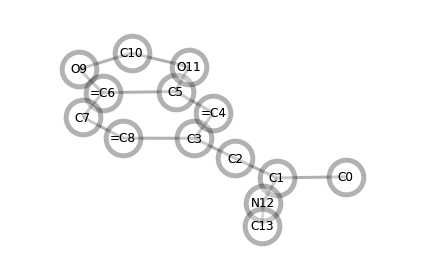

array([['=C4', 'C3'],
       ['=C4', 'C5'],
       ['C5', 'O11'],
       ['C10', 'O11'],
       ['C10', 'O9'],
       ['=C6', 'O9'],
       ['=C6', 'C7'],
       ['=C8', 'C7'],
       ['C2', 'C3'],
       ['C1', 'C2'],
       ['C1', 'N12'],
       ['C13', 'N12'],
       ['C0', 'C1'],
       ['=C6', 'C5'],
       ['=C8', 'C3']], dtype='<U3')

In [8]:
molstring_dummy = "[C3][b4][C2][C1][b1][C0][N12][C13][=C4][C5][O11][C10][O9][=C6][r5][C7][=C8][r6]"
molecule_dummy = moleculegraph.molecule(molstring_dummy)
molecule_dummy.visualize()

molecule_dummy.bond_names

In [9]:
molecule.atom_names

array(['C0', 'C1', 'N12', 'C13', 'C2', 'C3', '=C8', 'C7', '=C6', 'O9',
       'C10', 'O11', 'C5', '=C4'], dtype='<U3')

In [10]:
molecule_dummy.bond_list

array([[ 0,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [ 0,  1],
       [ 1,  2],
       [ 2,  4],
       [ 4,  5],
       [ 2,  3],
       [ 7, 11],
       [ 0, 13]])